In [1]:
import tensorflow as tf
from alexnet import *

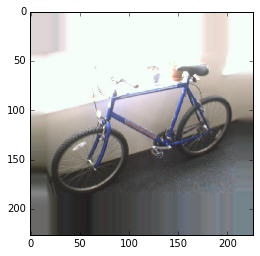

In [42]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

IMAGE_SIZE = 227
img = Image.open("office31_data/office31/webcam/images/bike/frame_0003.jpg")
img = img.resize([IMAGE_SIZE, IMAGE_SIZE])
img = np.asarray(img)
plt.imshow(img)
plt.show()

In [38]:
keep_prob = 1
NUM_CLASSES = 31
train_layers = ['fc8']

with tf.Graph().as_default() as g:
    img = tf.reshape(img, [IMAGE_SIZE, IMAGE_SIZE, 3])
    img = tf.cast(img, tf.float32)
    img.set_shape([IMAGE_SIZE, IMAGE_SIZE, 3])
    img = tf.image.per_image_standardization(img)
    img = tf.reshape(img, [1, IMAGE_SIZE, IMAGE_SIZE, 3])
    # Build a Graph that computes the logits predictions from the inference model.
    # Initialize model
    model = AlexNet(img, keep_prob, NUM_CLASSES, train_layers, 'source/')
    # Link variable to model output
    logits = model.fc8 
    logit = tf.reshape(logits, [-1])

    variable_averages = tf.train.ExponentialMovingAverage(0.9999)
    variables_to_restore = variable_averages.variables_to_restore()
    saver = tf.train.Saver(variables_to_restore)

    with tf.Session() as sess:
        dirname = os.path.dirname(__file__)
        dest_directory = os.path.join(dirname, 'office31_data/train')
        ckpt = tf.train.get_checkpoint_state(dest_directory)
        if ckpt and ckpt.model_checkpoint_path:
            # Restores from checkpoint
            saver.restore(sess, ckpt.model_checkpoint_path)
        else:
            print('No checkpoint file found')
            return
        logit = sess.run(logit)

INFO:tensorflow:Restoring parameters from office31_data/model_epoch5.6.ckpt


In [39]:
logit

array([-0.15885776,  2.1083622 ,  0.09952661,  0.00260702, -0.69911838,
       -0.42093328, -0.51045209,  1.45367777,  0.09731877, -0.09733607,
       -0.97147465, -0.43505552,  0.19490692,  0.64828736, -0.47819817,
       -0.43736455, -0.12912974,  0.5065183 , -0.01485911, -0.14961037,
       -0.15197575, -0.09114982, -0.30931771,  0.06139533,  0.31693232,
        0.09218935,  0.51715446, -0.27563265, -0.13957347, -0.15663463,
        0.03355345], dtype=float32)

In [40]:
np.argmax(logit)

1